In [1]:
import math 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm

data = pd.read_csv("HW1data.csv", sep = ",")
data.head(5)

,AGE,BATHS,BEDROOMS,FIREPLACE,OWNER,POOL,PRICE,SQFT,TRADITIONAL,WATERFRONT
0,18,1,1,1,1,1,66500,741,1,0
1,18,1,1,0,0,1,66000,741,1,0
2,18,1,1,1,1,0,68500,790,1,0
3,18,2,2,1,1,0,102000,2783,1,0
4,35,1,2,0,0,0,54000,1165,1,0


a. Plot house price against house size for houses with traditional style.

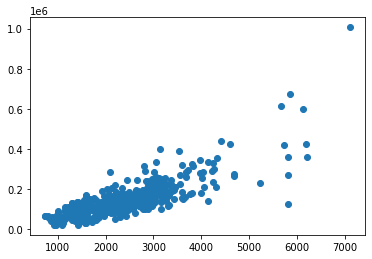

In [2]:

tr = data.loc[data.TRADITIONAL == 1, ["PRICE", "SQFT"]]

plt.scatter(tr.SQFT, tr.PRICE)
plt.show()

b. For a traditional-style house, estimate the linear regression model $PRICE = \beta_1 + \beta_2 * SQFT + \mathrm{e}$. Write down the estimated equation.

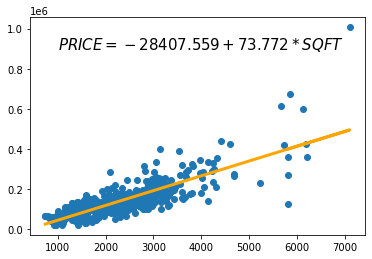

In [3]:
# Statsmodels Weighted Least Squares (WLS) ~ EViews Nonlinear Least Squares (NLS)

model = sm.WLS(endog = tr.PRICE, exog = sm.add_constant(tr.SQFT), weights = math.e).fit()

B1 = model.params["const"]
B2 = model.params["SQFT"]
equation = f"$PRICE = {B1:.3f} + {B2:.3f} * SQFT$"

plt.scatter(tr.SQFT, tr.PRICE)
plt.plot(tr.SQFT, B1 + B2 * tr.SQFT, c = "orange", lw = 3)
plt.text(1000, 900000, equation, size = 15)
plt.show()

c. Interpret the estimates.


* $\beta_1$, the intercept, tells us that a house with 0 sqft. has an estimated sale price of -$28407.56. 
* $\beta_2$, the slope, tells us that a house's sale price should increase by $73.77 for every 1 sqft. increase in size. 

d. Compute the least squares residuals and plot them against SQFT. Do any of the OLS assumptions appear violated?

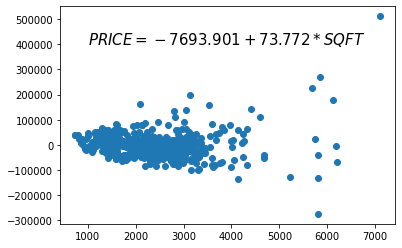



Heteroskedasticity Robust Covariance Matrix:

              0             1
0  1.819038e+07 -31334.044005
1 -3.133404e+04     54.448872


In [4]:
model = sm.OLS(endog = tr.PRICE, exog = sm.add_constant(tr.SQFT) + math.e).fit()

B1 = model.params["const"]
B2 = model.params["SQFT"]
equation = f"$PRICE = {B1:.3f} + {B2:.3f} * SQFT$"

plt.scatter(tr.SQFT, model.resid)
plt.text(1000, 400000, equation, size = 15)
plt.show()

print("\n\nHeteroskedasticity Robust Covariance Matrix:\n")
print(pd.DataFrame(model.cov_HC3))

Just from the scatter plot, the spread of the residuals is increasing; implying heteroscedasticity. 

This is confirmed with the variance-covariance matix (MacKinnon and White, 1985), where the diagonal is nonconstant. 

e. Test that the slope coefficient is statistically significant at 0.05 level of significance.

$H_0: \beta_2 = 0$

$H_1: \beta_2 \neq 0$

In [12]:
B2 = model.params["SQFT"]
SE = model.HC3_se["SQFT"]

t = B2/SE
print(f"t-statistic: {t:.3f} > 1.686\n")

if t > 1.686:
    print("Reject the null hypothesis. There is sufficient evidence to conclude that there is a \
            \nsignificant linear relationship between house price and size")
else:
    print("Do not reject the null hypothesis. There is insufficient evidence to conclude that there is a \
            \nsignificant linear relationship between house price and size\n")



t-statistic: 9.998 > 1.686

Reject the null hypothesis. There is sufficient evidence to conclude that there is a             
significant linear relationship between house price and size


f. Test that the slope is positive at 0.01 level of significance.

$H_0: \beta_2 < 0$

$H_1: \beta_2 > 0$

In [13]:
p = model.pvalues["SQFT"]

print(f"p-value: {p} < .01\n")

if p < .01:
    print("Reject the null hypothesis. There is sufficient evidence to conclude that the slope is positive")
else:
    print("Do not reject the null hypothesis. There is insufficient evidence to conclude that the slope is positive")


p-value: 1.562954540080757e-130 < .01

Reject the null hypothesis. There is sufficient evidence to conclude that the slope is positive
